## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('galton-stata11.tab', sep='\t')

In [7]:
data.head(10)

,family,father,mother,gender,height,kids,male,female
0,1,78.5,67.0,M,73.2,4,1.0,0.0
1,1,78.5,67.0,F,69.2,4,0.0,1.0
2,1,78.5,67.0,F,69.0,4,0.0,1.0
3,1,78.5,67.0,F,69.0,4,0.0,1.0
4,2,75.5,66.5,M,73.5,4,1.0,0.0
5,2,75.5,66.5,M,72.5,4,1.0,0.0
6,2,75.5,66.5,F,65.5,4,0.0,1.0
7,2,75.5,66.5,F,65.5,4,0.0,1.0
8,3,75.0,64.0,M,71.0,2,1.0,0.0
9,3,75.0,64.0,F,68.0,2,0.0,1.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 8 columns):
family    898 non-null object
father    898 non-null float64
mother    898 non-null float64
gender    898 non-null object
height    898 non-null float64
kids      898 non-null int64
male      898 non-null float64
female    898 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 56.2+ KB


In [9]:
data.isnull().sum()

family    0
father    0
mother    0
gender    0
height    0
kids      0
male      0
female    0
dtype: int64

In [10]:
data.family.nunique()

197

## Univariate analysis

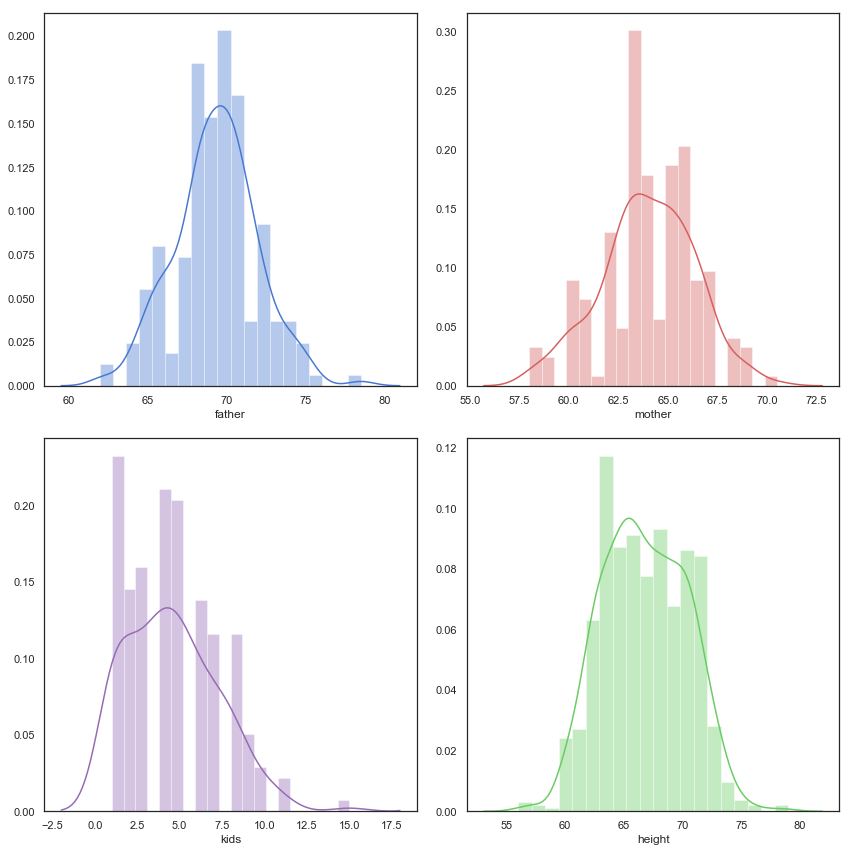

In [27]:
group = data.groupby('family')


sns.set(style="white", palette="muted", color_codes=True)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# plotting distribution of father's height
sns.distplot(group['father'].mean(), bins=20, color = 'b', ax = axes[0,0])

# plotting distribution of mother's height
sns.distplot(group['mother'].mean(), bins=20, color = 'r', ax = axes[0,1])

#plotting distribution of number of kids in each family
sns.distplot(group['kids'].mean(), bins=20, color = 'm', ax = axes[1,0])

#plotting distribution of heights
sns.distplot(data['height'], bins=20, color= 'g', ax = axes[1,1])

plt.tight_layout()

<Figure size 1080x1080 with 0 Axes>

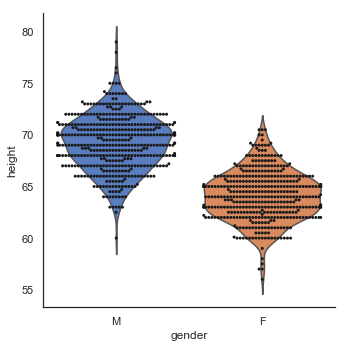

In [29]:
# height plot by sex
plt.figure(figsize=(15,15))
g = sns.catplot(x="gender", y="height", kind="violin", inner=None, data=data)
sns.swarmplot(x="gender", y="height", color="k", size=3, data=data, ax=g.ax);

## Pairplot and Correlation plots

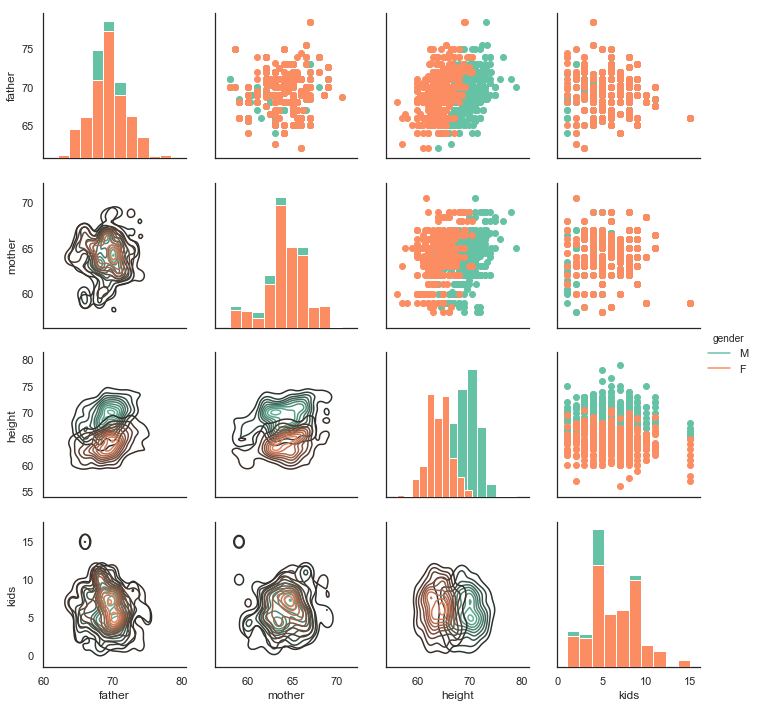

In [52]:
fig = sns.PairGrid(data[['father', 'mother', 'height', 'kids','gender']], palette='Set2', hue='gender')
fig.map_diag(plt.hist)
fig.map_upper(plt.scatter)
fig.map_lower(sns.kdeplot)
fig.add_legend()

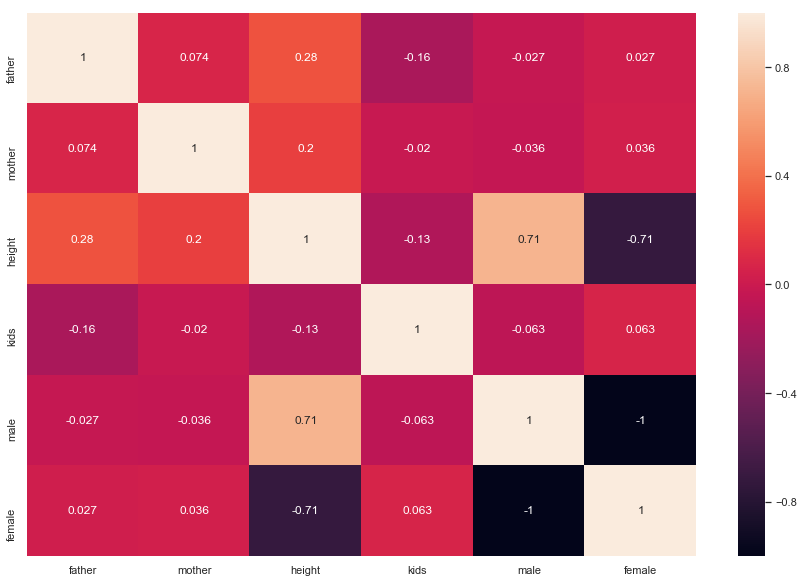

In [48]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

# Covariance Matrix and PCA

In [49]:
#covariance matrix
data.cov()

,father,mother,height,kids,male,female
father,6.102164,0.419810,2.437090,-1.061436,-0.033529,0.033529
mother,0.419810,5.322365,1.666856,-0.124078,-0.041082,0.041082
height,2.437090,1.666856,12.837305,-1.220963,1.279464,-1.279464
kids,-1.061436,-0.124078,-1.220963,7.210062,-0.084921,0.084921
male,-0.033529,-0.041082,1.279464,-0.084921,0.249961,-0.249961
female,0.033529,0.041082,-1.279464,0.084921,-0.249961,0.249961


In [50]:
#Eigen Value decomposition
eig_vals, eig_vecs = np.linalg.eig(data.cov())

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 2.98147989e-01  2.73126101e-01  9.11834568e-01 -9.07975190e-03
   7.06058684e-02  4.05220291e-16]
 [ 1.80984264e-01 -1.12975189e-01 -3.95301713e-02 -9.74452281e-01
   5.79777617e-02  1.96396589e-16]
 [ 9.07787738e-01 -2.63071424e-01 -2.03524192e-01  1.97728898e-01
  -1.61851889e-01 -8.87111916e-16]
 [-2.01164084e-01 -9.16679272e-01  3.40873955e-01  5.51084415e-02
   3.60000883e-04  1.04655215e-16]
 [ 8.30870199e-02 -3.95681547e-02 -6.84760410e-02  6.41352212e-02
   6.94786740e-01  7.07106781e-01]
 [-8.30870199e-02  3.95681547e-02  6.84760410e-02 -6.41352212e-02
  -6.94786740e-01  7.07106781e-01]]

Eigenvalues 
[1.44748195e+01 7.15329942e+00 5.14823435e+00 5.00047538e+00
 1.94988816e-01 9.72800151e-30]


In [84]:
# PCA analysis
from sklearn.decomposition import PCA

data['gender_new'] = data['gender'].map({'M': 1,'F': 0})

X = data[['father', 'mother', 'kids', 'gender_new']]
y = data['height']

pca = PCA(n_components=4)

pca.fit(X)
X_pca = pca.transform(X)

pc_df = pd.DataFrame(data = X_pca , columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pc_df.head()

,PC1,PC2,PC3,PC4
0,-7.050542,-6.605920,2.351177,-0.546580
1,-7.044198,-6.622025,2.352307,0.453270
2,-7.044198,-6.622025,2.352307,0.453270
3,-7.044198,-6.622025,2.352307,0.453270
4,-5.406275,-4.387327,1.077004,-0.519838


In [85]:
pca.explained_variance_ratio_

array([0.41806763, 0.30060328, 0.268184  , 0.01314508])

<IPython.core.display.Javascript object>


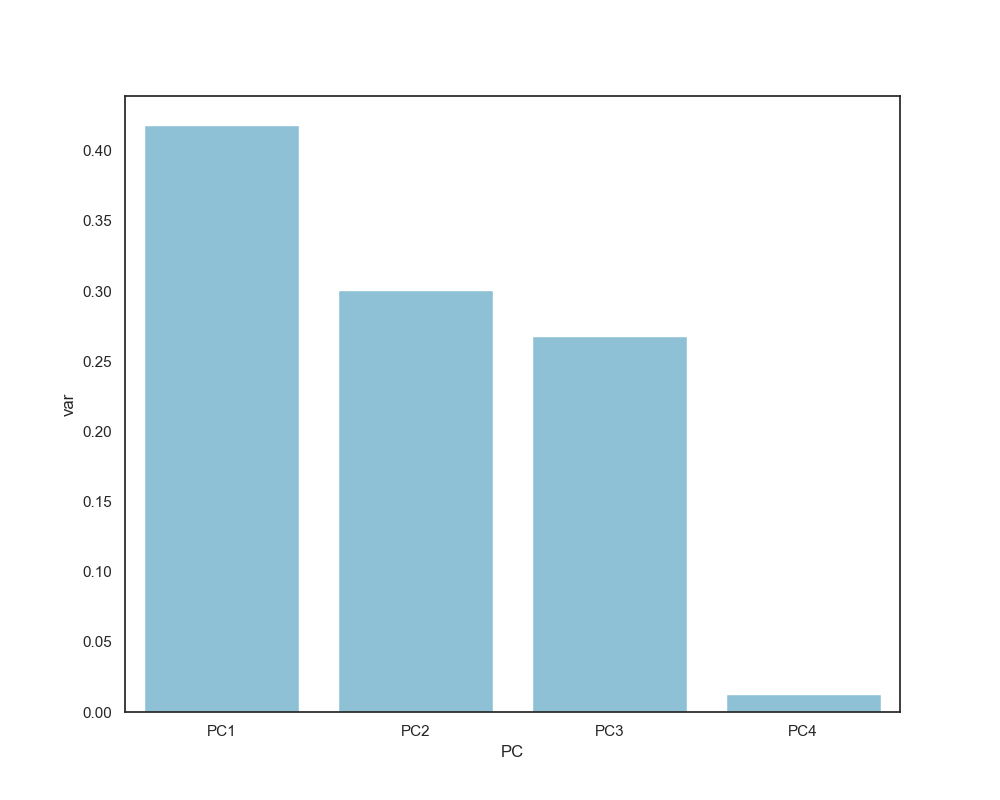

In [86]:
plt.figure(figsize=(10,8))
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", 
           data=pca_df, color="c");

<IPython.core.display.Javascript object>


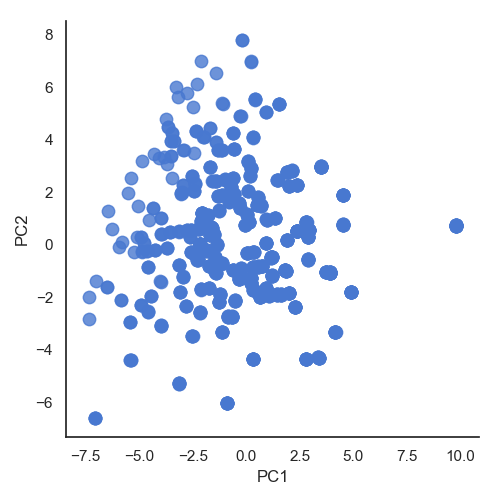

In [87]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

<IPython.core.display.Javascript object>


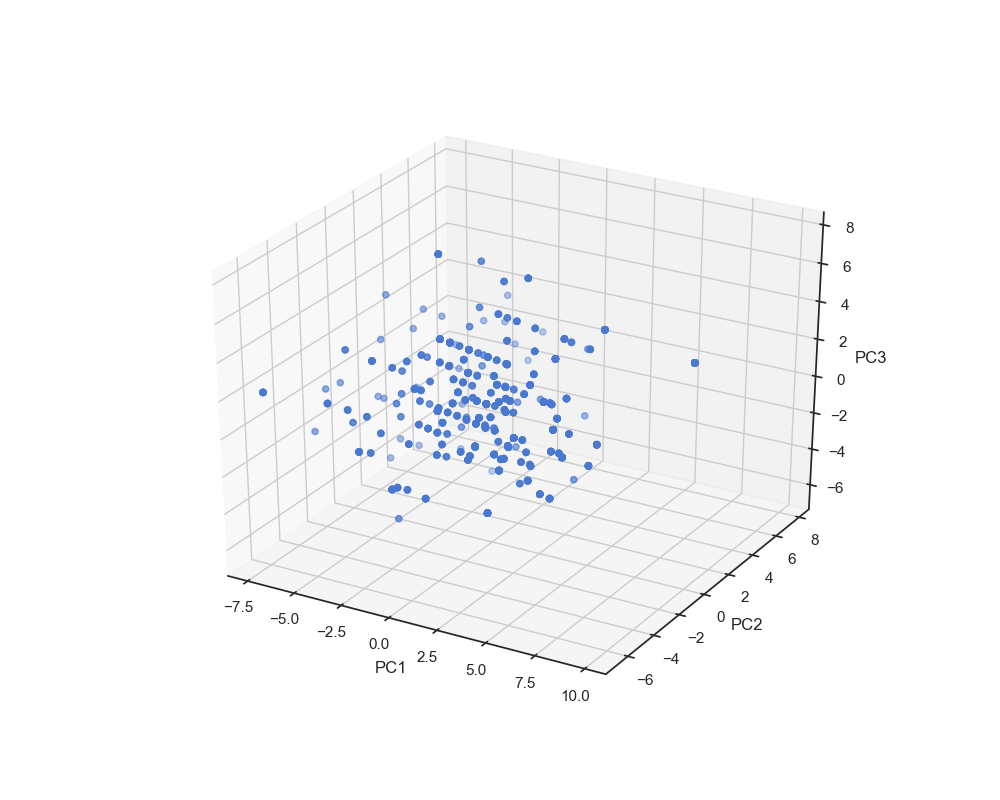

Text(0.5, 0, 'PC3')

In [139]:
from mpl_toolkits import mplot3d
%matplotlib notebook

plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(pc_df.PC1, pc_df.PC2, pc_df.PC3, cmap='viridis')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

## Regression Analysis

### Statsmodels OLS analysis

In [104]:
from statsmodels.api import OLS

X_father = data['father']
y = data['height']

model_father = OLS(y, X_father)

In [106]:
results_father = model_father.fit()
print(results_father.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.898e+05
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        18:13:49   Log-Likelihood:                -2452.5
No. Observations:                 898   AIC:                             4907.
Df Residuals:                     897   BIC:                             4912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
father         0.9636      0.002    538.311      0.0

In [105]:
X_mother = data['mother']
model_mother = OLS(y, X_mother)

In [107]:
results_mother = model_mother.fit()
print(results_mother.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.643e+05
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        18:13:53   Log-Likelihood:                -2493.7
No. Observations:                 898   AIC:                             4989.
Df Residuals:                     897   BIC:                             4994.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mother         1.0408      0.002    514.077      0.0

In [108]:
model = OLS(y, X)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.088e+05
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        18:14:08   Log-Likelihood:                -1976.7
No. Observations:                 898   AIC:                             3961.
Df Residuals:                     894   BIC:                             3981.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
father         0.5170      0.022     23.824      0.0

### SKLearn LinearRegression Analysis

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
y_hat = model_lr.predict(X_test)
r2_score(y_test, y_hat)

0.6037989557462681

In [118]:
X_train_f, X_test_f, y_train, y_test = train_test_split(data[['father','mother']], y, random_state=42)
model_lr_f = LinearRegression()
model_lr_f.fit(X_train_f, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [119]:
y_hat = model_lr_f.predict(X_test_f)
r2_score(y_test, y_hat)

0.0764081079741924

### Linear Regression analysis on PCA

In [124]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pc_df, y, random_state=42)
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [125]:
y_hat = model_pca.predict(X_test_pca)
r2_score(y_test, y_hat)

0.603798955746268

## Adding New Features

In [128]:
#adding mid-parent height
data['midparent'] = (data['father'] + data['mother'])/2

<IPython.core.display.Javascript object>


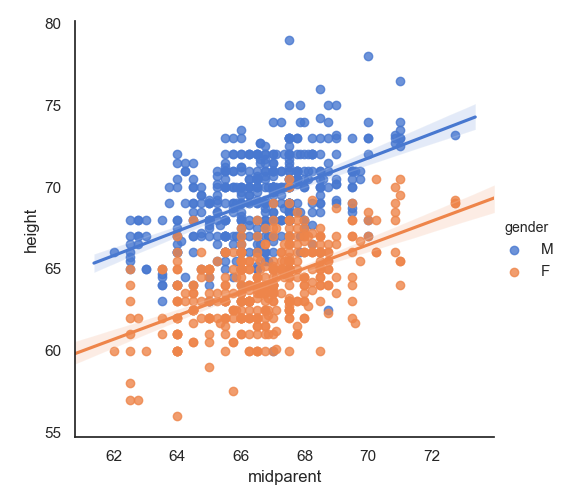

In [145]:
ax1 = sns.lmplot(x='midparent', y='height', hue='gender', data=data)

In [130]:
X_train_new, X_test_new, y_train, y_test = train_test_split(data[['midparent', 'gender_new']], y, random_state=42)
model_new = LinearRegression()
model_new.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
y_hat = model_new.predict(X_test_new)
r2_score(y_test, y_hat)

0.6111587246209689